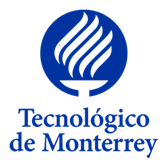

## Proyecto Integrador
## Smart Travel Assistant: Optimizando la Experiencia de Viaje con IA
## Avance 3

### Equipo 37
##### A00759664 - Joel Orlando Hernández Ramos
##### A01793486 - Juan Carlos Alvarado Carricarte
##### A00260430 - Juan Carlos Romo Cárdenas


## **Descripción del Proyecto**

Este proyecto se propone desarrollar un asistente de inteligencia artificial integrado en una plataforma de traveltech, que facilita la elección personalizada de hoteles y destinos para los usuarios. Utilizando la función "knowledge base" de Amazon Bedrock, el sistema integrará una extensa base de datos con información detallada sobre más de 2 millones de hoteles. Para este efecto  

El objetivo principal de este proyecto es transformar la experiencia de planificación de viajes, haciendo que sea más intuitiva, personalizada y respaldada por datos. Las metas específicas incluyen mejorar la satisfacción del cliente mediante recomendaciones precisas y personalizadas, reducir el tiempo necesario para planificar un viaje y aumentar la eficiencia del proceso de selección de destinos y hoteles.

El asistente empleará modelos avanzados de sistemas de recomendación, potenciados por un modelo de lenguaje de aprendizaje profundo (LLM), para sugerir itinerarios personalizados y ofrecer asistencia general en la planificación de viajes. Las recomendaciones incluirán referencias detalladas a los hoteles disponibles en nuestra base de datos, asegurando que los usuarios reciban opciones que no solo se ajustan a sus preferencias personales, sino que también maximizan la calidad y la relevancia de la información proporcionada.

## **Cargando Conjunto de Datos**

In [1]:
# Importando librerias requeridas
import re
import json
import uuid
import io
import logging
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import boto3


In [2]:
# Creado manejador de bitácora
logger = logging.getLogger(__name__)
logging.basicConfig(
    filename='../logs/Avance3_Equipo37_Bedrock_Baseline.log',
    level=logging.INFO,
    format='%(asctime)s %(levelname)-8s %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [3]:
DATA_SET = 's3://volindo-dataset/hotel-clean-data-set/hotel-data-set.snappy.parquet'
LOCAL_SET = '../local-data/hotel-data-set.snappy.parquet'
DATA_SOURCE = 'hotel-data-source'
AWS_KBID = 'S90Y9VRVCZ'


In [4]:
# Creando sesion para AWS Bedrock. Credenciales y configuracion se obtienen de ~/.aws
bedrock_agent_runtime = boto3.client(
    "bedrock-agent-runtime"
)

In [5]:
def retrieve_and_generate(input, kbid, runtime):
    return runtime.retrieve_and_generate(
        input = {
          'text': input  
        },
        retrieveAndGenerateConfiguration = {
            'type': 'KNOWLEDGE_BASE',
            'knowledgeBaseConfiguration': {
                'knowledgeBaseId': kbid,
                'modelArn': 'arn:aws:bedrock:us-east-1::foundation-model/amazon.titan-text-premier-v1:0'
                }
        }
    )

In [6]:
def display_response(response):
    # desplegando respuestas
    for citation in response['citations']:
        print(citation['generatedResponsePart']['textResponsePart']['text'])
        print('Referencias:')
        for reference in citation['retrievedReferences']:
            print(f"\nPais: {reference['metadata']['Country']}, Continente:{reference['metadata']['Continent']}, URI:{reference['metadata']['x-amz-bedrock-kb-source-uri']}")
            print(f"<< {reference['content']['text']} >>")


In [7]:
input = '''Can you suggest accomodation near pilanesberg national park in south africa?'''

response = retrieve_and_generate(input, AWS_KBID, bedrock_agent_runtime)

display_response(response)

Pilanesberg National Park is a national park in South Africa that is home to a variety of wildlife, including the "Big Five" (lion, leopard, rhinoceros, elephant, and buffalo). The park offers a range of accommodation options to suit different budgets and preferences. Here are some of the accommodation options near Pilanesberg National Park:

1. Bakubung Bush Lodge: This luxury lodge is located on the outskirts of the park and offers spacious rooms, a swimming pool, a spa, and a restaurant.
Referencias:

Pais: South Africa, Continente:Africa, URI:s3://clean-hotel-data/hotel-data-set-ZA.xlsx
<< The park entrance fee is ZAR 140 per guest, per day for travel dates from now until December 31, 2023.&nbsp;Disclaimer notification: Amenities are subject to availability and may be chargeable as per the hotel policy.	stand 2 black rhino game reserve pilanesberg, pilanesberg 7130, pilanesberg, 7130, south africa	7130	ZA	27-0664795639	Pilanesberg	26.978668	-25.163587	5 	1358828	sea otters lodge	Si

In [8]:
input = '''Can you suggest accomodation near pilanesberg national park in the north west province in south africa?'''

response = retrieve_and_generate(input, AWS_KBID, bedrock_agent_runtime)

display_response(response)

Pilanesberg National Park in the North West Province of South Africa offers various accommodations, including Newlands Cottages, Mountain Cabin, Sea Otters Lodge, Vredenhof 7 Adults Only, and Nkorho Bush Lodge
Referencias:

Pais: South Africa, Continente:Africa, URI:s3://clean-hotel-data/hotel-data-set-ZA.xlsx
<< Contact the property in advance to make arrangements.&nbsp;Disclaimer notification: Amenities are subject to availability and may be chargeable as per the hotel policy.	3/19 black rhino game reserve r565, pilanesberg game reservepilanesberg national parkpilanesberg, pilanesberg, 0366, south africa	0366	ZA	+27712791110	Pilanesberg	26.982003	-25.168261	4 	1612427	newlands cottages	HeadLine : Near University of Cape TownLocation : With a stay at Newlands Cottages in Cape Town, you ll be a 2-minute drive from University of Cape Town and 7 minutes from Kirstenbosch National Botanical Gardens.  This 4-star cottage is 7.3 mi (11.8 km) from Victoria and Alfred Waterfront and 8.2 mi (1

In [9]:
input = '''What attractions are close to Black Rhino Game Lodge, north west province in south africa?'''

response = retrieve_and_generate(input, AWS_KBID, bedrock_agent_runtime)

display_response(response)

I could not find an exact answer to the question, however, I was able to find information that may be relevant.

The Pilanesberg National Park is a national park in North West Province, South Africa. It is located in the crater of a long-extinct volcano and is one of the largest volcanic complexes of its type in the world.
Referencias:

Pais: South Africa, Continente:Africa, URI:s3://clean-hotel-data/hotel-data-set-ZA.xlsx
<< Gaborone Game Reserve is 38 km from Buffalo Ridge Safari Lodge, while Gaborone Golf Course is 39 km from the property. The nearest airport is Sir Seretse Khama International, 52 km from the accommodation, and the property offers a paid airport shuttle service.&nbsp;Disclaimer notification: Amenities are subject to availability and may be chargeable as per the hotel policy.	madikwe game reserve, , madikwe game reserve, 2840, south africa	2840	ZA	+27112346500	Madikwe Game Reserve	26.20305	-24.76688	5 	1246266	khandizwe river lodge	Located on the banks of the Crocodi

In [10]:
input = '''Can you suggest accommodation in cape town, western cape province in south africa?'''

response = retrieve_and_generate(input, AWS_KBID, bedrock_agent_runtime)

display_response(response)

Here are some accommodations in Cape Town, Western Cape Province, South Africa:
- The Westin Cape Town
Referencias:

Pais: South Africa, Continente:Africa, URI:s3://clean-hotel-data/hotel-data-set-ZA.xlsx
<< Quench your thirst with your favorite drink at the bar/lounge. A complimentary continental breakfast is included.Business, Other Amenities Featured amenities include express check-in, dry cleaning/laundry services, and multilingual staff. Free self parking is available onsite.&nbsp;Disclaimer notification: Amenities are subject to availability and may be chargeable as per the hotel policy.	25 disa road, cape town 7441, cape town, 7441, south africa	7441	ZA	(27) 215565273	Cape Town	18.48636	-33.81999	4 	1013840	the westin cape town	HeadLine : Connected to the convention centerRooms : Make yourself at home in one of the air-conditioned rooms featuring minibars. Your room comes with a pillowtop bed. Complimentary wireless Internet access keeps you connected, and satellite programming 

In [11]:
input = '''Can you suggest accommodation in cape town, western cape province in south africa, minimum rating of 4?'''

response = retrieve_and_generate(input, AWS_KBID, bedrock_agent_runtime)

display_response(response)

Here are some accommodations in Cape Town, Western Cape Province in South Africa, with a minimum rating of 4:
- Wescamp Villa
Referencias:

Pais: South Africa, Continente:Africa, URI:s3://clean-hotel-data/hotel-data-set-ZA.xlsx
<< Conveniences include separate sitting areas and coffee/tea makers, and housekeeping is provided on a limited basis.Rec, Spa, Premium Amenities Take advantage of recreation opportunities such as an outdoor pool, or other amenities including wireless Internet access (surcharge) and concierge services. Additional features include babysitting/childcare (surcharge) and barbecue grills.Business, Other Amenities Featured amenities include a 24-hour front desk, laundry facilities, and an elevator (lift).&nbsp;Disclaimer notification: Amenities are subject to availability and may be chargeable as per the hotel policy.	43 central drive, cape town 8040, cape town, 8040, south africa	8040	ZA	0027 21 4286440	Cape Town	18.38004	-33.95437	5 	1251182	wescamp villa	HeadLine :

In [12]:
input = '''Can you suggest accommodation in Hoedspruit, limpopo province in south africa?'''

response = retrieve_and_generate(input, AWS_KBID, bedrock_agent_runtime)

display_response(response)

I could not find an exact answer to the question, but I did find some information that may be relevant. Here are some accommodation options in Hoedspruit, Limpopo Province, South Africa:
- Lemon Tree B&B: This bed and breakfast is located in Kloof and offers outdoor pool, tennis court, and free Wi-Fi
Referencias:

Pais: South Africa, Continente:Africa, URI:s3://clean-hotel-data/hotel-data-set-ZA.xlsx
<< Deposit is payable by bank transfer or credit card and is due within 48 hours of booking the reservation.&nbsp;Disclaimer notification: Amenities are subject to availability and may be chargeable as per the hotel policy.	374 kierrie klapper street hoedspruit wildlife estate, hoedspruit wildlife estatepo box 1622hoedspruit 1380, hoedspruit, 1380, south africa	1380	ZA	27615235041	Hoedspruit	30.968502	-24.353032	4 	1775141	lemon tree b&b	Offering outdoor pool and a tennis court, Lemon Tree B&B is located in Kloof. Free Wi-Fi access is available in all areas.  Featuring a a garden view, roo

In [13]:
input = '''Can you suggest 5 places to stay in Monterrey, Nuevo Leon in Mexico?'''

response = retrieve_and_generate(input, AWS_KBID, bedrock_agent_runtime)

display_response(response)

Here are 5 places to stay in Monterrey, Nuevo Leon in Mexico:
- Hotel Parque Central
Referencias:

Pais: Mexico, Continente:Americas, URI:s3://clean-hotel-data/hotel-data-set-MX.xlsx
<< The hotel has a bar and a restaurant. Other facilities include a business centre, a fitness centre as well as laundry and dry cleaning services.  Hotel Parque Central is 10 minutes’ drive from Cintermex Exhibition Centre and the Santa Lucia river walk. Monterrey International Airport is 35 minutes’ drive from the hotel. Food & beverage services at this property may be limited or unavailable due to Coronavirus (COVID-19). Due to Coronavirus (COVID-19), this property has reduced reception and service operating hours. In accordance with government guidelines to minimise transmission of the Coronavirus (COVID-19), this property may request additional documentation from guests to validate identity, travel itinerary and other relevant information, during dates where such guidelines exist.&nbsp;Disclaimer noti

In [14]:
input = '''Can you suggest 5 places to stay in Monterrey, Nuevo Leon in Mexico, close to Tec de Monterrey?'''

response = retrieve_and_generate(input, AWS_KBID, bedrock_agent_runtime)

display_response(response)

I could not find an exact answer to the question, but I was able to find 3 places to stay in Monterrey, Nuevo Leon in Mexico, close to Tec de Monterrey:
- Hotel Hacienda Sánchez
Referencias:

Pais: Mexico, Continente:Americas, URI:s3://clean-hotel-data/hotel-data-set-MX.xlsx
<< Popular points of interest near Galeria Plaza Monterrey include MARCO Museum Monterrey, Macroplaza and Pabellon M. The nearest airport is Monterrey International, 33 km from the accommodation, and the property offers a paid airport shuttle service.&nbsp;Disclaimer notification: Amenities are subject to availability and may be chargeable as per the hotel policy.	411 avenida constitución edificio, monterrey centro,, 64000 monterrey, mexico, monterrey, 64000, mexico	64000	MX	N/A	Monterrey	-100.32286	25.66608	5 	1404200	hotel hacienda sánchez	Featuring an outdoor swimming pool, Hacienda Sánchez is situated 1.5 km north of the historic centre of Valladolid. It offers colonial-style accommodation set in beautiful gard

## **Conclusiones**



‌El objetivo de la base de conocimiento en *Retrieval Augmented Generation*, o *RAG*, es proveer una fuente de información para proveer contexto adicional al modelo generativo, o *LLM* para que pueda generar una mejor respuesta. La calidad de la respuesta dependerá del modelo LLM usado y de la calidad del contenido en la base de conocimiento.

En AWS Bedrock una base de conocimiento se construye usando archivos de texto conteniendo la información de contexto y sus respectivos archivos de metadatos asociados (AWS, s.f.).

Para este proyecto ya se contaba con una base de datos de hoteles que contiene una descripción del hotel que puede incluir amenidades del hotel, guías para check-in y check-out, y/o una lista de atracciones y sitios de interés cercanos. La base de datos también incluye otra información del hotel como el nombre del hotel, la ciudad y el país donde se localiza y el nivel de estrellas.

Crear el archivo con la descripción del hotel con su archivo asociado con metadatos es por lo tanto la única actividad de la etapa de ingeniería de características. 


## **Referencias**

* Monigatti, L. (2023, 6 de diciembre). A Guide on 12 Tuning Strategies for Production-Ready RAG Applications. Medium. https://towardsdatascience.com/a-guide-on-12-tuning-strategies-for-production-ready-rag-applications-7ca646833439

* AWS. (s.f.). Set up a data source for your knowledge base - Amazon Bedrock. docs.aws.amazon.com. Recuperado 7 de mayo, 2024, de https://docs.aws.amazon.com/bedrock/latest/userguide/knowledge-base-ds.html

* ISO. (s.f.) ISO 3166 — Country Codes. Internation Standards Organization. Recuperado 3 de mayo, 2024 de https://www.iso.org/iso-3166-country-codes.html

